<a href="https://colab.research.google.com/github/tgchen321/NLP_EmbedFintechJournal/blob/main/3.%20Research%20data/FreeGPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# import necessary libraries
%cd /content/drive/MyDrive/Colab Notebooks/summerProject/
import tensorflow_hub as hub
import tensorflow as tf
from google.colab import drive
import myNLPTool, pickle, math
from matplotlib import pyplot as plt

drive.mount('/content/drive')
GDpath = '/content/drive/MyDrive/Colab Notebooks/summerProject/'

!nvidia-smi

/content/drive/MyDrive/Colab Notebooks/summerProject
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mon Aug  7 13:12:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |          

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
with open("dataList.pkl", "rb") as pkl:
		dataset = pickle.load(pkl)

targetSents, targetWords, wholeFileInWords = myNLPTool.Tokenise(dataset[0]["fullText"])
_, _, queryWords = myNLPTool.Tokenise(dataset[0]["citeSent"])

def Evaluation(result):
	# print(result)
	print("# RESULTS: ")
	result.sort(reverse = True)
	print("Average similarity(cosine sim.): " + str(sum(result)/len(result)))
	print("Maximum similarity(cosine sim.): " + str(result[0]))
	print("Minimum similarity(cosine sim.): " + str(result[-1]))
	if len(result) > 10:
		top10 = math.ceil(len(result)/10)
		print("Top 10% average similarity(cosine sim.): " + str(sum(result[:top10])/top10))
		_, ax = plt.subplots(figsize =(10, 7))
		ax.hist(result)
		plt.show()
	print()

In [25]:
# Load pre-trained universal sentence encoder model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Sentences for which you want to create embeddings,
# passed as an array in embed()
embeddings = embed([dataset[0]["citeSent"]] + targetSents)

# Printing embeddings of each sentence
# print(embeddings)

# RESULTS: 
Average similarity(cosine sim.): 0.08126362880811984
Maximum similarity(cosine sim.): 0.4644280970096588
Minimum similarity(cosine sim.): -0.14825300872325897
Top 10% average similarity(cosine sim.): 0.2824981524830773


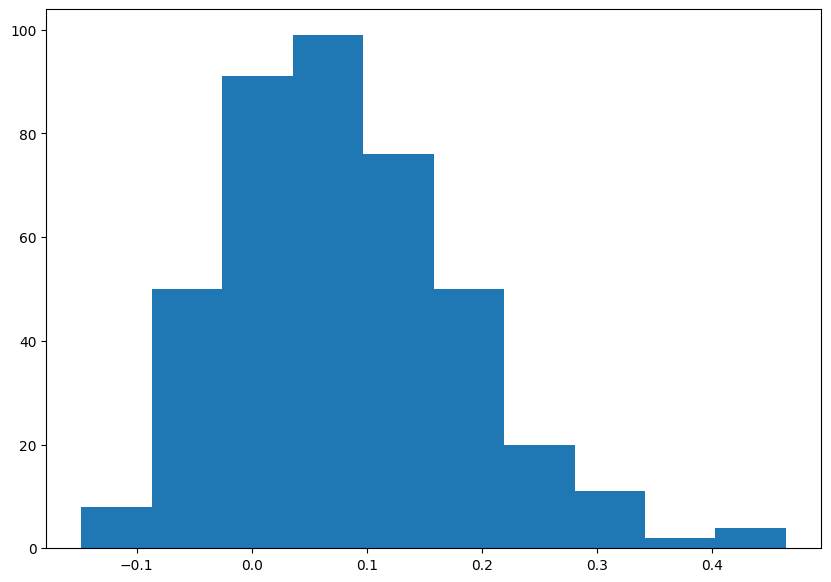

In [36]:
# To print each embeddings along with its corresponding
# sentence below code can be used.
result = []
for i in range(1, len(targetSents)):
    # print(Sentences[i])
    # print(embeddings[i])
    result.append(tf.keras.losses.CosineSimilarity()(embeddings[0], embeddings[i]).numpy() * (-1))

Evaluation(result)